In [1]:
# ==============================
# 1. 기본 라이브러리 로드
# ==============================
import pandas as pd  # 데이터프레임 처리 라이브러리
import numpy as np  # 수학 연산 및 배열 처리 라이브러리
import matplotlib.pyplot as plt  # 데이터 시각화 라이브러리
%matplotlib inline  

# ==============================
# 2. 머신러닝 모델 관련 라이브러리
# ==============================

# (1) 앙상블 학습 모델
from sklearn.ensemble import VotingClassifier  # 여러 개의 분류 모델을 조합하는 투표 기반 앙상블 학습

# (2) 개별 분류 모델
from sklearn.linear_model import LogisticRegression  # 로지스틱 회귀 분류기
from sklearn.neighbors import KNeighborsClassifier  # K-최근접 이웃(KNN) 분류기
from sklearn.ensemble import RandomForestClassifier  # 랜덤 포레스트 분류기
from sklearn.ensemble import GradientBoostingClassifier  # 그래디언트 부스팅 트리 분류기
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


# (3) 부스팅 기반 분류 모델 (XGBoost & LightGBM)
import xgboost as xgb  # XGBoost 라이브러리 (트리 기반 부스팅 기법)
from xgboost import XGBClassifier  # XGBoost 분류기
from lightgbm import LGBMClassifier  # LightGBM 분류기

# ==============================
# 3. 모델 평가 및 성능 지표
# ==============================

from sklearn.metrics import confusion_matrix  # 혼동 행렬
from sklearn.metrics import precision_score, recall_score  # 정밀도(precision) 및 재현율(recall)
from sklearn.metrics import f1_score, roc_auc_score  # F1-score 및 ROC-AUC 점수
from sklearn.metrics import accuracy_score  # 분류 모델의 정확도(accuracy)

# ==============================
# 4. 하이퍼파라미터 최적화
# ==============================

from hyperopt import hp  # 하이퍼파라미터 탐색 공간 정의
from hyperopt import STATUS_OK  # 최적화 과정에서 상태 반환
from hyperopt import fmin, tpe, Trials  # 최적의 하이퍼파라미터 탐색을 위한 함수들

# ==============================
# 5. 데이터셋 로드 및 데이터 분할
# ==============================

from sklearn.datasets import load_breast_cancer  # 유방암 데이터셋 (예제 데이터셋)
from sklearn.model_selection import train_test_split  # 데이터 분할 (학습/테스트 세트)
from sklearn.model_selection import cross_val_score  # 교차 검증을 통한 모델 성능 평가

# ==============================
# 6. 데이터 전처리
# ==============================

from sklearn.preprocessing import StandardScaler  # 데이터 표준화 (평균 0, 분산 1 변환)
from sklearn.impute import SimpleImputer  # 결측값 처리

from scipy.stats import randint
# ==============================
# 7. 통계 분석 관련 라이브러리
# ==============================

from scipy.stats import shapiro, skew, kurtosis  # 데이터 분포 분석을 위한 함수들

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import seaborn as sns
# ==============================
# 8. 기타 유틸리티
# ==============================

import time  # 코드 실행 시간 측정
import warnings  # 경고 메시지 무시 설정
warnings.filterwarnings('ignore')  # 경고 메시지 출력 방지


In [2]:
# 데이터 로드
dataset=load_breast_cancer()
X_features=dataset.data
y_label=dataset.target
cancer_dr=pd.DataFrame(
    data=X_features
    ,columns=dataset.feature_names
)
cancer_dr['target']=y_label

X_features=cancer_dr.iloc[:,:-1] 
y_label=cancer_dr.iloc[:,-1] 

In [3]:
cancer_dr.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
cancer_dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
cancer_dr.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
print(dataset.target_names)
print(cancer_dr['target'].value_counts())
# malignant(악성) :0,benign(양성) :1
# malignant : 357개
# benign :212개

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [7]:
data_df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [8]:
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    return df_copy

def get_train_test_dataset(df=None):
    if df is None:  
        return '데이터베이스가 존재하지 않습니다'
    else:
        df_copy = get_preprocessed_df(df)
        X_features = df_copy.iloc[:, :-1]
        y_target = df_copy.iloc[:, -1]
        X_train, X_test, y_train, y_test = train_test_split(
            X_features,
            y_target,
            test_size=0.3,
            random_state=0,
            stratify=y_target
        )
        return X_train, X_test, y_train, y_test


In [10]:
# 평가 지표 불균형 데이터 셋
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred) # 정확도 점수
    precision = precision_score(y_test , pred) # 정밀도 점수
    recall = recall_score(y_test , pred) # 재현율 점수
    f1 = f1_score(y_test,pred) # 정밀도, 재현율 조화평균 값
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba) # AUC 점수 : 불균형 데이터 셋에서 필요
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [11]:
def get_model_train_eval(
    model                   # 분류 알고리즘
    ,ftr_train=None         # 학습 데이터
    ,ftr_test=None          # 테스트 데이터
    ,tgt_train=None         # 학습 데이터 레이블
    ,tgt_test=None          # 테스트 데이터 레이블
    ):
    model.fit(ftr_train,tgt_train)
    pred = model.predict(ftr_test)
    pred_proba=model.predict_proba(ftr_test)[:,1] # 예측 확률
    print(model.__class__.__name__)
    get_clf_eval(tgt_test,pred,pred_proba)

In [12]:
# 모델 학습/예측/평가

lr_clf=LogisticRegression(solver='liblinear')
knn_clf=KNeighborsClassifier(n_neighbors=8)
rf_clf=RandomForestClassifier(n_estimators=100,random_state=0,max_depth=16)
gbc_clf=GradientBoostingClassifier()
dt_clf=DecisionTreeClassifier()
ada_clf=AdaBoostClassifier(n_estimators=100)
vo_clf=VotingClassifier(
    estimators=[('LR',lr_clf),('KNN',knn_clf),('RF',rf_clf),('GBC',gbc_clf),('DT',dt_clf),('ADA',ada_clf)]
    ,voting='soft'
)
X_train,X_test,y_train,y_test=get_train_test_dataset(cancer_dr)

In [13]:
get_model_train_eval(
    lr_clf
    ,ftr_train=X_train
    ,ftr_test=X_test
    ,tgt_train=y_train
    ,tgt_test=y_test
)

LogisticRegression
오차 행렬
[[ 57   7]
 [  5 102]]
정확도: 0.9298, 정밀도: 0.9358, 재현율: 0.9533, F1: 0.9444, AUC:0.9914


In [14]:
get_model_train_eval(
    knn_clf
    ,ftr_train=X_train
    ,ftr_test=X_test
    ,tgt_train=y_train
    ,tgt_test=y_test
)

KNeighborsClassifier
오차 행렬
[[ 55   9]
 [  4 103]]
정확도: 0.9240, 정밀도: 0.9196, 재현율: 0.9626, F1: 0.9406, AUC:0.9581


In [15]:
get_model_train_eval(
    rf_clf
    ,ftr_train=X_train
    ,ftr_test=X_test
    ,tgt_train=y_train
    ,tgt_test=y_test
)

RandomForestClassifier
오차 행렬
[[ 59   5]
 [  3 104]]
정확도: 0.9532, 정밀도: 0.9541, 재현율: 0.9720, F1: 0.9630, AUC:0.9781


In [16]:
get_model_train_eval(
    gbc_clf
    ,ftr_train=X_train
    ,ftr_test=X_test
    ,tgt_train=y_train
    ,tgt_test=y_test
)

GradientBoostingClassifier
오차 행렬
[[ 60   4]
 [  5 102]]
정확도: 0.9474, 정밀도: 0.9623, 재현율: 0.9533, F1: 0.9577, AUC:0.9866


In [17]:
get_model_train_eval(
    dt_clf
    ,ftr_train=X_train
    ,ftr_test=X_test
    ,tgt_train=y_train
    ,tgt_test=y_test
)

DecisionTreeClassifier
오차 행렬
[[57  7]
 [11 96]]
정확도: 0.8947, 정밀도: 0.9320, 재현율: 0.8972, F1: 0.9143, AUC:0.8939


In [18]:
get_model_train_eval(
    ada_clf
    ,ftr_train=X_train
    ,ftr_test=X_test
    ,tgt_train=y_train
    ,tgt_test=y_test
)

AdaBoostClassifier
오차 행렬
[[ 59   5]
 [  5 102]]
정확도: 0.9415, 정밀도: 0.9533, 재현율: 0.9533, F1: 0.9533, AUC:0.9889


In [19]:
get_model_train_eval(
    vo_clf
    ,ftr_train=X_train
    ,ftr_test=X_test
    ,tgt_train=y_train
    ,tgt_test=y_test
)

VotingClassifier
오차 행렬
[[ 59   5]
 [  5 102]]
정확도: 0.9415, 정밀도: 0.9533, 재현율: 0.9533, F1: 0.9533, AUC:0.9883


In [20]:
classifiers = [lr_clf, knn_clf, rf_clf, gbc_clf, dt_clf, ada_clf, vo_clf]
print("{:<30} {:<15}".format('Classifier', 'Accuracy'))  # Header for alignment
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    preds = classifier.predict(X_test)
    pred_probs = classifier.predict_proba(X_test)
    class_name = classifier.__class__.__name__
    accuracy = accuracy_score(y_test, preds)
    print("{:<30} {:<15.4f}".format(class_name, accuracy))


Classifier                     Accuracy       
LogisticRegression             0.9298         
KNeighborsClassifier           0.9240         
RandomForestClassifier         0.9532         
GradientBoostingClassifier     0.9415         
DecisionTreeClassifier         0.9123         
AdaBoostClassifier             0.9415         
VotingClassifier               0.9415         


In [ ]:

params = {
    'n_estimators':[100,150, 200, 250,300,350, 400,450,500],
    'max_depth' : [2,4,6, 8, 10, 12,16,18,20,22,24,26,28,30,32,34,36,38,40],
    'min_samples_leaf' : [4,6,8, 10,12, 14,16,18 ],
    'min_samples_split' : [8, 10, 12, 14, 16,18,20]
}

In [ ]:
# RandomForestClassifier 객체 생성 후 GridSearch 수행
rf_clf=RandomForestClassifier(random_state=0,n_jobs=-1)
rf_clf.fit(X_train, y_train)
rf_predictions = rf_clf.predict(X_test)

grid_cv=GridSearchCV(rf_clf,param_grid=params,cv=2,n_jobs=-1)
grid_cv.fit(X_train,y_train)
pred=grid_cv.predict(X_test)

print(f'최적 하이퍼 파라미터\n {grid_cv.best_params_}')
print(f'최고 예측 정확도\n {grid_cv.best_score_}')

In [ ]:
# RandomForestClassifier 객체 생성 후 RandomSearch 수행

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
params = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(2, 6),
    'min_samples_split': randint(1, 10),
    'min_samples_leaf': randint(1, 6),
    'bootstrap': [True, False]
}

random_cv = RandomizedSearchCV(
    rf_clf
    , param_distributions=params
    , n_iter=100
    , cv=2
    , n_jobs=-1
    , random_state=0
)
random_cv.fit(X_train, y_train)
pred = random_cv.predict(X_test)

print(f'최적 하이퍼 파라미터\n {random_cv.best_params_}')
print(f'최고 예측 정확도\n {random_cv.best_score_}')

최적 하이퍼 파라미터
 {'bootstrap': False, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 137}
최고 예측 정확도
 0.9698492462311559


In [ ]:
rf_clf1=RandomForestClassifier(
    n_estimators=137
    ,max_depth=5
    ,min_samples_leaf=3
    ,min_samples_split=5
    ,random_state=0
)
rf_clf1.fit(X_train,y_train)
pred= rf_clf1.predict(X_test)
print(f'예측 정확도 : {accuracy_score(y_test,pred)}')
pred_probs=rf_clf1.predict_proba(X_test)[:,1]

get_clf_eval(y_test,pred,pred_probs)

예측 정확도 : 0.9473684210526315
오차 행렬
[[ 58   6]
 [  3 104]]
정확도: 0.9474, 정밀도: 0.9455, 재현율: 0.9720, F1: 0.9585, AUC:0.9793


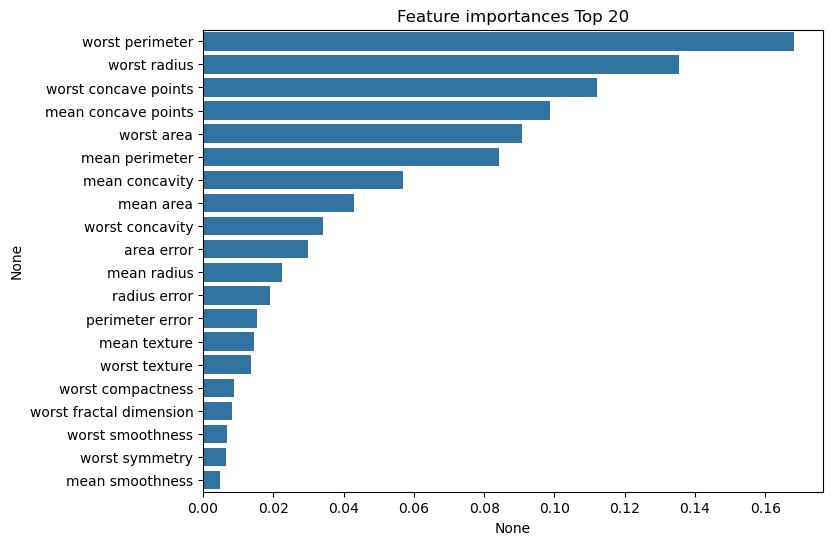

In [ ]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=data_df.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [ ]:
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f'GBM 정확도 : {gb_accuracy}')
print(f'GBM 수행 시간 : {time.time()-start_time:.4f}')

pred_probs=gb_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test,pred,pred_probs)

GBM 정확도 : 0.935672514619883
GBM 수행 시간 : 0.4161
오차 행렬
[[ 58   6]
 [  3 104]]
정확도: 0.9474, 정밀도: 0.9455, 재현율: 0.9720, F1: 0.9585, AUC:0.9863


hyperopt,xgboost 사용

In [ ]:
dataset=load_breast_cancer()
X_features=dataset.data
y_label=dataset.target
cancer_dr=pd.DataFrame(
    data=X_features
    ,columns=dataset.feature_names
)
cancer_dr['target']=y_label

X_features=cancer_dr.iloc[:,:-1] 
y_label=cancer_dr.iloc[:,-1] 

X_train,X_test,y_train,y_test=train_test_split(
    X_features
    ,y_label
    ,train_size=0.8
    ,random_state=156
)

X_tr,X_val,y_tr,y_val=train_test_split(
    X_train
    ,y_train
    ,test_size=0.1
    ,random_state=156
)

# XGBoost 모델에 대한 하이퍼파라미터 검색 공간을 정의
xgb_search_space = {
    'max_depth': hp.quniform('max_depth', 5, 20, 1),  # 트리 깊이: 5에서 20까지 1씩 증가하는 정수 값
    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),  # 최소 자식 노드 가중치: 1에서 2까지 1씩 증가하는 정수 값
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),  # 학습률: 0.01에서 0.2 사이의 연속값
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)  # 각 트리의 컬럼 샘플 비율: 0.5에서 1 사이의 연속값
}

# 목적 함수 정의: 주어진 하이퍼파라미터 값을 받아 XGBoost 모델의 성능을 평가
def objective_func(search_space):
    # XGBoost 분류기 객체 생성
    xgb_clf = XGBClassifier(
        n_estimators=100,  # 100개의 트리를 사용
        max_depth=int(search_space['max_depth']),  # max_depth를 정수로 변환하여 설정
        min_child_weight=int(search_space['min_child_weight']),  # min_child_weight를 정수로 변환하여 설정
        learning_rate=search_space['learning_rate'],  # learning_rate는 연속값으로 설정
        colsample_bytree=search_space['colsample_bytree'],  # colsample_bytree는 연속값으로 설정
        eval_metric='logloss'  # 평가 지표로 로그 손실 사용
    )
    
    # 교차 검증을 통해 모델 정확도 평가
    accuracy = cross_val_score(
        xgb_clf # 점수를 구할 모델 설정
        , X_train # 학습데이터 전체를 넣어야한다.
        , y_train # 학습데이터의 값을 넣어야한다.
        , scoring='accuracy' # 평가 점수 : 정화고들 평가
        , cv=3  # 3겹 교차 검증 사용 : 정확도가 3개가 나온다
    ) 
    
    # 반환값: 평균 정확도를 음수로 변환하여 최소화하려는 함수로 반환
    # -1 * np.mean(accuracy)에서 -1을 곱하는 이유는 최적화 함수의 목적에 맞게 손실(loss) 값을 최소화하는 방향으로 Hyperopt를 사용할 수 있도록 하기 위해서입니다.
    # 정확도(accuracy)는 높을수록 좋습니다. 하지만 Hyperopt는 최소화를 목표로 하므로, 정확도가 높을수록 손실 값(loss)은 낮아져야 하므로, 음수 값으로 변환하여야 합니다.
    # cross_val_score로 얻은 accuracy는 최대화하려는 값입니다.
    # Hyperopt는 최소화 문제를 풀기 때문에, accuracy 값을 음수로 변환하여 최소화하려는 목적에 맞게 사용합니다.
    return {'loss': -1 * np.mean(accuracy), 'status': STATUS_OK}

# 하이퍼파라미터 튜닝 결과를 저장할 Trials 객체 생성
trial_val = Trials()

# Hyperopt의 fmin 함수 사용하여 하이퍼파라미터 튜닝 시작
best = fmin(
    fn=objective_func
    ,space=xgb_search_space
    ,algo=tpe.suggest
    ,max_evals=50
    ,trials=trial_val
    ,rstate=np.random.default_rng(seed=0)
    ,verbose=True
)

# 최적화 결과 출력
print(f'best : {best}')

output = 'colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(
    round(best['colsample_bytree'], 5),
    round(best['learning_rate'], 5),
    int(best['max_depth']),
    int(best['min_child_weight'])
)

print(output)


100%|██████████| 50/50 [00:12<00:00,  4.05trial/s, best loss: -0.964868711513884] 
best : {'colsample_bytree': 0.7254819122205993, 'learning_rate': 0.198562507758628, 'max_depth': 7.0, 'min_child_weight': 2.0}
colsample_bytree:0.72548, learning_rate:0.19856, max_depth:7, min_child_weight:2


In [ ]:

xgb_wrapper = XGBClassifier(n_estimators=1000,
                            learning_rate=round(best['learning_rate'], 5),
                            max_depth=int(best['max_depth']),
                            min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'], 5)
                            , early_stopping_rounds=50
                            , eval_metric='logloss'
                           )


evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(
    X_tr
    , y_tr
    ,eval_set=evals
    , verbose=True
)

preds = xgb_wrapper.predict(X_test) # 예측값
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1] # 예측 확률

get_clf_eval(y_test, preds, pred_proba)

[0]	validation_0-logloss:0.51701	validation_1-logloss:0.56472
[1]	validation_0-logloss:0.41318	validation_1-logloss:0.49231
[2]	validation_0-logloss:0.33628	validation_1-logloss:0.42976
[3]	validation_0-logloss:0.27936	validation_1-logloss:0.38492
[4]	validation_0-logloss:0.23560	validation_1-logloss:0.34984
[5]	validation_0-logloss:0.19923	validation_1-logloss:0.32528
[6]	validation_0-logloss:0.17190	validation_1-logloss:0.30862


[7]	validation_0-logloss:0.15074	validation_1-logloss:0.29213
[8]	validation_0-logloss:0.13179	validation_1-logloss:0.28160
[9]	validation_0-logloss:0.11561	validation_1-logloss:0.26961
[10]	validation_0-logloss:0.10320	validation_1-logloss:0.26412
[11]	validation_0-logloss:0.09247	validation_1-logloss:0.25915
[12]	validation_0-logloss:0.08267	validation_1-logloss:0.25388
[13]	validation_0-logloss:0.07623	validation_1-logloss:0.25045
[14]	validation_0-logloss:0.07025	validation_1-logloss:0.25341
[15]	validation_0-logloss:0.06465	validation_1-logloss:0.25283
[16]	validation_0-logloss:0.05885	validation_1-logloss:0.24583
[17]	validation_0-logloss:0.05384	validation_1-logloss:0.24344
[18]	validation_0-logloss:0.04957	validation_1-logloss:0.24147
[19]	validation_0-logloss:0.04649	validation_1-logloss:0.24252
[20]	validation_0-logloss:0.04367	validation_1-logloss:0.24241
[21]	validation_0-logloss:0.04111	validation_1-logloss:0.24170
[22]	validation_0-logloss:0.03830	validation_1-logloss:0.2

## PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# 2. PCA 적용 (설명 분산 비율 누적합 기준 95% 이상 유지하는 성분 수로 설정)
pca = PCA(n_components=0.95)  # 전체 분산의 95%를 유지하는 최소 성분 수 자동 계산
X_pca = pca.fit_transform(X_scaled)

print(f'원본 특성 수: {X_features.shape[1]}')
print(f'PCA 이후 특성 수: {X_pca.shape[1]}')

# 3. 학습용/테스트용 데이터 분리
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y_label, test_size=0.3, random_state=0, stratify=y_label)

# 4. 분류 모델 학습 및 평가
model = RandomForestClassifier(random_state=0)
model.fit(X_train_pca, y_train)
pred = model.predict(X_test_pca)
pred_proba = model.predict_proba(X_test_pca)[:, 1]

# 평가 함수 호출
get_clf_eval(y_test, pred, pred_proba)


In [ ]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=y_label, palette='coolwarm')
plt.title('PCA 2D 시각화 (유방암 데이터셋)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
